# Project: Investigatation of TMDb Movie Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

* The database under investigation is collected from The Movie Database (TMDb) with information about 10000 movies. The database contains the following attributes:
    - id 
    - imdb_id
    - homepage
    - original_title
    - overview
    - popularity
    - production_companies
    - cast
    - budget
    - revenue 
    - director
    - tagline
    - keywords
    - overview
    - runtime
    - genres
    - release_date
    - vote_count
    - vote_average
    - release_year
    - budget_adj : same as budget but account for inflation over time. 
    - revenue_adj: same as budget but account for inflation over time. 
    
    
* Questions of interest:
    - Which genres are most popular from year to year?
    - What kinds of properties are associated with movies that have high revenues?
    

In [1]:
#import statemenets

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis. 

### General Properties
- Step 1: load data 
- Step 2: check the data types and for null values using .info() in pandas 
- Step 3: check for the value ranges and stats using .descibe() in pandas 

In [2]:
# Load your data and print out a few lines. 
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


From the above we can note that we have multi-valued columns: Genres, production_compaines, director and cast. this need to be handled in the cleaning section of the data

In [3]:
# check for null values and datatypes in the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

This data contains 21 columns and 10866 rows. it contain null values in the following columns: homepage, cast, director, tagline, keywords, genres, production companies. The datatype of the release_date needs to be changed to datetime instead of string.

In [4]:
#check for the value ranges and stats to look for erroneous values
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Erroneous values in the dataset can be seen in budget, revenue, budget_adj, revenue_adj since we can see the min value is 0. also for the popularity the max value 32.98 while Q3 is 0.7138 so this value needs to be normalized to get better results.

### Data Cleaning

In this section will handle rows with null values, wrong datatype and erroneous values 
- Step 1: Drop columns that are not related with our analysis. which are the following:tagline, overview, homepage, imdb_id,keywords, cast, revenue, budget, production_companies, director. note here that i dropped the revenue and budget because i will depend on budget_adj and revenue_adj columns that account for inflation.
- Step 2: Remove erroneous values in budget_adj and revenue_adj 
- Step 3: Check if any missing values remain in genres 
- Step 4: Fix the datatype of release_date into date 
- Step 5: Normalize popularity column 
- Step 6: Handle multivalued genres column 

#### Step 1: Drop columns that are not related with our analysis

In [5]:
# drop the columns not required in the analysis
df.drop(['tagline','overview','homepage','imdb_id','keywords','cast','production_companies','director'], axis = 1, inplace= True)
df.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(6), object(3)
memory usage: 1.1+ MB


now we have 13 columns and 10866 rows 

#### Step 2: Remove erroneous values in budget_adj and revenue_adj 

In [7]:
# drop budget or revenue with 0 value
df.drop(df[(df.budget ==0) | (df.revenue ==0)].index, axis = 0,inplace= True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 10848
Data columns (total 13 columns):
id                3855 non-null int64
popularity        3855 non-null float64
budget            3855 non-null int64
revenue           3855 non-null int64
original_title    3855 non-null object
runtime           3855 non-null int64
genres            3855 non-null object
release_date      3855 non-null object
vote_count        3855 non-null int64
vote_average      3855 non-null float64
release_year      3855 non-null int64
budget_adj        3855 non-null float64
revenue_adj       3855 non-null float64
dtypes: float64(4), int64(6), object(3)
memory usage: 421.6+ KB


the above shows that we have 13 columns and 3855 rows and we don't have null values any more. 

In [9]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3855.000000,3855.000000,3.855000e+03,3.855000e+03,3855.000000,3855.000000,3855.00000,3855.000000,3.855000e+03,3.855000e+03
mean,39888.783398,1.191400,3.720183e+07,1.076589e+08,109.215824,527.611933,6.16786,2001.263294,4.423630e+07,1.370294e+08
std,67213.815955,1.475002,4.220291e+07,1.765248e+08,19.922166,879.868374,0.79504,11.281989,4.480403e+07,2.160944e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.20000,1960.000000,9.693980e-01,2.370705e+00
25%,6074.000000,0.462448,1.000000e+07,1.357645e+07,95.000000,71.000000,5.70000,1995.000000,1.309053e+07,1.834123e+07
50%,11322.000000,0.797298,2.400000e+07,4.479322e+07,106.000000,204.000000,6.20000,2004.000000,3.001558e+07,6.171861e+07
75%,38577.000000,1.368245,5.000000e+07,1.241530e+08,119.000000,580.000000,6.70000,2010.000000,6.061307e+07,1.632401e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.40000,2015.000000,4.250000e+08,2.827124e+09


Now looking at the budget column we can see that the min value is 1 while the Q1 is 1e7 which is a wide range with a large std of 1e7. So in order to investigate whether 1 is an outlier, we will try to look into values below 10M.

In [10]:
# check the budget stats for values below 10M [Q1 of the budget values]
df[df.budget < 1.000000e+07].budget.describe()

count    9.390000e+02
mean     4.151066e+06
std      2.697803e+06
min      1.000000e+00
25%      1.993825e+06
50%      4.000000e+06
75%      6.400000e+06
max      9.600000e+06
Name: budget, dtype: float64

Observing the values below a budget of 10M, we have 939 rows. We can see that 25% of the data is below 2M. we still have a wide range of values below between 2M and 1. 

In [11]:
# checking the budget stats for values below 2M [Q1 of movies with budget below 10M]
df[df.budget < 1.993825e+06].budget.describe()

count    2.350000e+02
mean     7.476565e+05
std      5.634518e+05
min      1.000000e+00
25%      2.250000e+05
50%      7.770000e+05
75%      1.100000e+06
max      1.987650e+06
Name: budget, dtype: float64

around 59 rows are below 225k out of the total 3855 rows.

In [12]:
df[df.budget < 2.250000e+05].budget.describe()

count        59.000000
mean      53476.457627
std       65950.712119
min           1.000000
25%          25.000000
50%       25000.000000
75%      100000.000000
max      220000.000000
Name: budget, dtype: float64

In [13]:
df[df.budget < 25000].head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1354,985,0.331417,10000,7000000,Eraserhead,89,Science Fiction|Fantasy|Horror|Drama,3/19/77,194,7.1,1977,35977.810326,2.518447e+07
1733,22717,0.278387,75,134,Wanted,129,Action|Comedy|Crime|Thriller,9/18/09,18,4.9,2009,76.230033,1.361977e+02
2398,39356,0.028456,3,43,Boy,87,Drama|Comedy,2/14/10,26,7.3,2010,3.000000,4.300000e+01
2519,10397,0.352060,25,13,Angela's Ashes,145,Drama,12/25/99,24,7.0,1999,32.726321,1.701769e+01
2618,39964,0.090186,1,100,Lost & Found,95,Comedy|Romance,4/23/99,14,4.8,1999,1.309053,1.309053e+02


One of the listed movie with a budget of 75 is wanted, When checked in Imdb the budget was 75M so this means that this value is not correct and maybe it is the same for other movies. so this proves that some movies might have wrong values so i will remove the movies values with budget less 25k   

In [14]:
df.drop(df[(df.budget < 25000)].index, axis = 0,inplace= True)
df.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [15]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3826.000000,3826.000000,3.826000e+03,3.826000e+03,3826.000000,3826.000000,3826.000000,3826.000000,3.826000e+03,3.826000e+03
mean,39892.402771,1.197141,3.748379e+07,1.083883e+08,109.278097,530.794825,6.168662,2001.280972,4.457156e+07,1.379358e+08
std,67313.696513,1.478847,4.223764e+07,1.769583e+08,19.868983,882.307624,0.795249,11.273625,4.480709e+07,2.166077e+08
min,5.000000,0.001117,2.500000e+04,2.000000e+00,26.000000,10.000000,2.200000,1960.000000,3.000000e+04,2.370705e+00
25%,6069.000000,0.465873,1.000000e+07,1.401073e+07,96.000000,72.000000,5.700000,1995.000000,1.337695e+07,1.878163e+07
50%,11292.500000,0.802740,2.400000e+07,4.565877e+07,106.000000,206.000000,6.200000,2004.000000,3.030653e+07,6.230869e+07
75%,38541.750000,1.379977,5.000000e+07,1.249111e+08,119.000000,582.000000,6.700000,2010.000000,6.076720e+07,1.646624e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


Now the budget range from 25k-10M which is more reasonable than 1-10M. But looking closely we can see we have an issue with revenue where the min is 2 compared to 2.789 Max value.

In [16]:
# check the revenue window for values below 14M
df[df.revenue < 1.401073e+07].revenue.describe()

count    9.570000e+02
mean     5.281333e+06
std      4.408099e+06
min      2.000000e+00
25%      1.021398e+06
50%      4.388563e+06
75%      9.237470e+06
max      1.401069e+07
Name: revenue, dtype: float64

957 rows. a minimum value of 2 and Q1 of 1.02M dollar.

In [17]:
# check the revenue window for values below 1.02 dollars
df[df.revenue < 1.021398e+06].revenue.describe()

count    2.390000e+02
mean     3.390444e+05
std      3.141334e+05
min      2.000000e+00
25%      5.556250e+04
50%      2.382270e+05
75%      5.939445e+05
max      1.020921e+06
Name: revenue, dtype: float64

we have 239 rows with minimum value of 2 and Q1 of 5.556250e+04 dollar revenue [almost 59 rows].

In [18]:
# check the revenue window for values below 5.556250e+04 dollars
df[df.revenue < 5.556250e+04].revenue.describe()

count       60.00000
mean     19631.25000
std      19365.32104
min          2.00000
25%       2882.50000
50%      11798.50000
75%      32499.50000
max      55125.00000
Name: revenue, dtype: float64

We have 60 rows. half the values are below 11798.5 dollars

In [19]:
df[df.revenue < 11798.5].tail()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
8226,48781,0.183034,6400000,6,Never Talk to Strangers,86,Thriller|Romance,10/20/95,15,4.5,1995,9.158188e+06,8.585801
8523,9431,0.578849,15000000,5,Bordello of Blood,87,Horror|Comedy,8/16/96,27,4.9,1996,2.085325e+07,6.951084
9332,1497,0.799449,25000000,78,Teenage Mutant Ninja Turtles II: The Secret of...,88,Science Fiction|Adventure|Action|Comedy|Family,3/22/91,161,6.0,1991,4.002732e+07,124.885242
10294,10285,0.504169,3000000,15,Jason Goes to Hell: The Final Friday,87,Horror|Thriller,8/13/93,86,3.9,1993,4.528410e+06,22.642049
10307,2259,0.450208,25000000,6,The House of the Spirits,140,Romance|Drama,10/19/93,52,6.7,1993,3.773675e+07,9.056820


Checking the house of spirit revenue is listed as 6.5M in imdb, so it is listed as a wrong value. so to be safe i will drop all revenues below 11798.

In [20]:
df.drop(df[(df.revenue < 11798)].index, axis = 0,inplace= True)
df.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [21]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3796.000000,3796.000000,3.796000e+03,3.796000e+03,3796.000000,3796.000000,3796.000000,3796.000000,3.796000e+03,3.796000e+03
mean,39704.035827,1.202594,3.766695e+07,1.092448e+08,109.393309,534.183614,6.172734,2001.243414,4.479191e+07,1.390259e+08
std,67242.154029,1.483183,4.230713e+07,1.773928e+08,19.859426,884.875889,0.792529,11.293230,4.485523e+07,2.171134e+08
min,5.000000,0.001117,2.500000e+04,1.330800e+04,26.000000,10.000000,2.200000,1960.000000,3.000000e+04,1.388176e+04
25%,6015.750000,0.467870,1.000000e+07,1.456021e+07,96.000000,73.000000,5.700000,1995.000000,1.358189e+07,1.951956e+07
50%,11282.500000,0.808991,2.500000e+07,4.630034e+07,106.000000,207.500000,6.200000,2004.000000,3.039101e+07,6.314653e+07
75%,38356.250000,1.388066,5.000000e+07,1.262249e+08,119.000000,584.000000,6.700000,2010.000000,6.087715e+07,1.658074e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


Now the budget range from 13.3k-2.78e9 which is more reasonable.

#### Step 3: Check if any missing values remain in genres

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3796 entries, 0 to 10848
Data columns (total 13 columns):
id                3796 non-null int64
popularity        3796 non-null float64
budget            3796 non-null int64
revenue           3796 non-null int64
original_title    3796 non-null object
runtime           3796 non-null int64
genres            3796 non-null object
release_date      3796 non-null object
vote_count        3796 non-null int64
vote_average      3796 non-null float64
release_year      3796 non-null int64
budget_adj        3796 non-null float64
revenue_adj       3796 non-null float64
dtypes: float64(4), int64(6), object(3)
memory usage: 415.2+ KB


we don't have null values in genres any more.and we have 3826

#### Step 4: Fix the datatype of release_date into datetime

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3796 entries, 0 to 10848
Data columns (total 13 columns):
id                3796 non-null int64
popularity        3796 non-null float64
budget            3796 non-null int64
revenue           3796 non-null int64
original_title    3796 non-null object
runtime           3796 non-null int64
genres            3796 non-null object
release_date      3796 non-null object
vote_count        3796 non-null int64
vote_average      3796 non-null float64
release_year      3796 non-null int64
budget_adj        3796 non-null float64
revenue_adj       3796 non-null float64
dtypes: float64(4), int64(6), object(3)
memory usage: 415.2+ KB


The release date is object so this we need to convert to datetime

In [24]:
# change the format of release date into datetime instead of a string
df['release_date'] = pd.to_datetime(df['release_date'], format='%m/%d/%y')

In [25]:
# confirm the change of datatype of release_date into datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3796 entries, 0 to 10848
Data columns (total 13 columns):
id                3796 non-null int64
popularity        3796 non-null float64
budget            3796 non-null int64
revenue           3796 non-null int64
original_title    3796 non-null object
runtime           3796 non-null int64
genres            3796 non-null object
release_date      3796 non-null datetime64[ns]
vote_count        3796 non-null int64
vote_average      3796 non-null float64
release_year      3796 non-null int64
budget_adj        3796 non-null float64
revenue_adj       3796 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(6), object(2)
memory usage: 415.2+ KB


The release date is a datetime now

#### Step 5: Normalize popularity column 

In [26]:
df.popularity.describe()

count    3796.000000
mean        1.202594
std         1.483183
min         0.001117
25%         0.467870
50%         0.808991
75%         1.388066
max        32.985763
Name: popularity, dtype: float64

The range of values for popularity column is 0-32.98. so in order to have a more consistent column values, i want to scale the values in range from 0-1 the values. since 75%-max value range between 1.37 and 32.98

In [27]:
df['normalized_popularity'] = (df.popularity - df.popularity.min()) / (df.popularity.max() - df.popularity.min())
df.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,normalized_popularity
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.000000
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,0.861577
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,0.397500
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,0.338703
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,0.282977


In [28]:
df.normalized_popularity.describe()

count    3796.000000
mean        0.036425
std         0.044966
min         0.000000
25%         0.014151
50%         0.024492
75%         0.042048
max         1.000000
Name: normalized_popularity, dtype: float64

In [29]:
# drop popularity column 
df.drop('popularity',inplace=True,axis=1)
df.head()

,id,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,normalized_popularity
0,135397,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.000000
1,76341,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,0.861577
2,262500,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,0.397500
3,140607,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,0.338703
4,168259,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,0.282977


#### Step 6: Handle multivalued genres column 
- seperate the genres column in a new dataframe and use id as an index for the new dataframe
- merge the new dataframe with the old dateframe using the id column

In [30]:
# check the genre column in the dataframe 
df.genres.head()

0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
2           Adventure|Science Fiction|Thriller
3     Action|Adventure|Science Fiction|Fantasy
4                        Action|Crime|Thriller
Name: genres, dtype: object

Genres is multivalued column seperated by (|). 
Step 6.a: extract the genre and id columns from the df while preserving the id as index

In [31]:
df.set_index('id')['genres']

id
135397          Action|Adventure|Science Fiction|Thriller
76341           Action|Adventure|Science Fiction|Thriller
262500                 Adventure|Science Fiction|Thriller
140607           Action|Adventure|Science Fiction|Fantasy
168259                              Action|Crime|Thriller
281957                   Western|Drama|Adventure|Thriller
87101           Science Fiction|Action|Thriller|Adventure
286217                    Drama|Adventure|Science Fiction
211672                  Family|Animation|Adventure|Comedy
150540                            Comedy|Animation|Family
206647                             Action|Adventure|Crime
76757            Science Fiction|Fantasy|Action|Adventure
264660                              Drama|Science Fiction
257344                      Action|Comedy|Science Fiction
99861                    Action|Adventure|Science Fiction
273248                        Crime|Drama|Mystery|Western
260346                              Crime|Action|Thriller
102899     

Step 6.b: split the resulting using str.split with expand option set to true  to return the values into multiple columns

In [32]:
df.set_index('id')['genres'].str.split('|', expand = True)

,0,1,2,3,4
id,,,,,
135397,Action,Adventure,Science Fiction,Thriller,None
76341,Action,Adventure,Science Fiction,Thriller,None
262500,Adventure,Science Fiction,Thriller,None,None
140607,Action,Adventure,Science Fiction,Fantasy,None
168259,Action,Crime,Thriller,None,None
281957,Western,Drama,Adventure,Thriller,None
87101,Science Fiction,Action,Thriller,Adventure,None
286217,Drama,Adventure,Science Fiction,None,None
211672,Family,Animation,Adventure,Comedy,None


Step 6.c: Stack results of the split into an index instead of columns 

In [33]:
df.set_index('id')['genres'].str.split('|', expand = True).stack()

id       
135397  0             Action
        1          Adventure
        2    Science Fiction
        3           Thriller
76341   0             Action
        1          Adventure
        2    Science Fiction
        3           Thriller
262500  0          Adventure
        1    Science Fiction
        2           Thriller
140607  0             Action
        1          Adventure
        2    Science Fiction
        3            Fantasy
168259  0             Action
        1              Crime
        2           Thriller
281957  0            Western
        1              Drama
        2          Adventure
        3           Thriller
87101   0    Science Fiction
        1             Action
        2           Thriller
        3          Adventure
286217  0              Drama
        1          Adventure
        2    Science Fiction
211672  0             Family
                  ...       
9584    1             Comedy
        2              Drama
11850   0             Horror
    

Step 6.d: remove the second index [0 1 2 3 4] which resulted from the split for the genres column using reset_index with level set to 1.     

In [34]:
df.set_index('id')['genres'].str.split('|', expand = True).stack().reset_index(1, drop = True)

id
135397             Action
135397          Adventure
135397    Science Fiction
135397           Thriller
76341              Action
76341           Adventure
76341     Science Fiction
76341            Thriller
262500          Adventure
262500    Science Fiction
262500           Thriller
140607             Action
140607          Adventure
140607    Science Fiction
140607            Fantasy
168259             Action
168259              Crime
168259           Thriller
281957            Western
281957              Drama
281957          Adventure
281957           Thriller
87101     Science Fiction
87101              Action
87101            Thriller
87101           Adventure
286217              Drama
286217          Adventure
286217    Science Fiction
211672             Family
               ...       
9584               Comedy
9584                Drama
11850              Horror
11850            Thriller
11850     Science Fiction
11850             Mystery
24961           Adventure
24961    

Step 6.e: create a dateframe with a new index for the new resulting column and id using reset_index  

In [35]:
df.set_index('id')['genres'].str.split('|', expand = True).stack().reset_index(1, drop = True).reset_index(name = 'Genre')

,id,Genre
0,135397,Action
1,135397,Adventure
2,135397,Science Fiction
3,135397,Thriller
4,76341,Action
5,76341,Adventure
6,76341,Science Fiction
7,76341,Thriller
8,262500,Adventure
9,262500,Science Fiction


In [36]:
# all the steps at once 
temp_df = df.set_index('id')['genres'].str.split('|', expand = True).stack().reset_index(1, drop = True).reset_index(name = 'Genre')
temp_df.head()

,id,Genre
0,135397,Action
1,135397,Adventure
2,135397,Science Fiction
3,135397,Thriller
4,76341,Action


In [37]:
# merge the temp_df with the original dataframe
df_final = pd.merge(df, left_on ='id', right = temp_df, right_on = 'id', how='inner')
df_final.head()

,id,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,normalized_popularity,Genre
0,135397,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.000000,Action
1,135397,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.000000,Adventure
2,135397,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.000000,Science Fiction
3,135397,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.000000,Thriller
4,76341,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,0.861577,Action


In [38]:
# drop the genres column from the dataframe 
df_final.drop('genres', axis = 1, inplace= True)

In [39]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10168 entries, 0 to 10167
Data columns (total 13 columns):
id                       10168 non-null int64
budget                   10168 non-null int64
revenue                  10168 non-null int64
original_title           10168 non-null object
runtime                  10168 non-null int64
release_date             10168 non-null datetime64[ns]
vote_count               10168 non-null int64
vote_average             10168 non-null float64
release_year             10168 non-null int64
budget_adj               10168 non-null float64
revenue_adj              10168 non-null float64
normalized_popularity    10168 non-null float64
Genre                    10168 non-null object
dtypes: datetime64[ns](1), float64(4), int64(6), object(2)
memory usage: 1.1+ MB


we have 10245 rows with 13 column.

In [40]:
# remove revenue and budget since i will use the adjusted value
df_final.drop(['revenue','budget'],inplace=True, axis=1)

In [41]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10168 entries, 0 to 10167
Data columns (total 11 columns):
id                       10168 non-null int64
original_title           10168 non-null object
runtime                  10168 non-null int64
release_date             10168 non-null datetime64[ns]
vote_count               10168 non-null int64
vote_average             10168 non-null float64
release_year             10168 non-null int64
budget_adj               10168 non-null float64
revenue_adj              10168 non-null float64
normalized_popularity    10168 non-null float64
Genre                    10168 non-null object
dtypes: datetime64[ns](1), float64(4), int64(4), object(2)
memory usage: 953.2+ KB


The final dataframe that will be used in the analysis will have 10245 rows and 11 columns

<a id='eda'></a>
## Exploratory Data Analysis

Before going through the analysis i will explore the variables that will be used in the analysis such as 'runtime','vote_average','budget_adj'. i will explore the distribution in values for these attributes.


In [42]:
df_final.runtime.describe()

count    10168.000000
mean       109.730921
std         20.289432
min         26.000000
25%         96.000000
50%        106.000000
75%        119.000000
max        338.000000
Name: runtime, dtype: float64

The shortest movie in the cleaned data is 26 minutes while the longest Movie is 338 minutes.

Text(0.5,1,u'Distribution of Movie Run time')

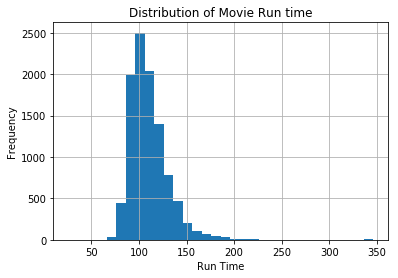

In [43]:
# the distribution of runtime values
bins=range(df_final.runtime.min(), df_final.runtime.max() + 10, 10)
df_final.runtime.hist(bins=bins);
plt.xlabel('Run Time')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Run time')

From the histogram we can see that Movie Run times is clustred around 100 minutes and is skewed to the right. Which is as expected since the median is 106 minutes so that means half the values are below this and half is above.

The second attribute we will look into is the vote average

In [44]:
df_final.vote_average.describe()

count    10168.000000
mean         6.157907
std          0.788356
min          2.200000
25%          5.700000
50%          6.200000
75%          6.700000
max          8.400000
Name: vote_average, dtype: float64

The movie with the least vote  got 2.2 while the highest voted movie got 8.4. The medien is 6.2 so half the movies got below or above this value

Text(0.5,1,u'Distribution of Movie Average Vote')

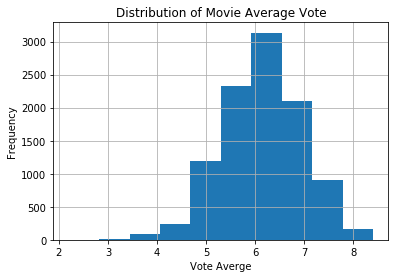

In [45]:
# the distribution of vote average values
df_final.vote_average.hist();
plt.xlabel('Vote Averge')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Average Vote')

From the histogram we can see that Movie Average rating is clustred around 6 and that the figure is skewed to the left, which means that most of the movie voting average is bigger than the mean and the mode value is higher than the median and mean.

The The third attribute we will look into is the adjusted budget

In [46]:
df_final.budget_adj.describe()

count    1.016800e+04
mean     5.008933e+07
std      4.765356e+07
min      3.000000e+04
25%      1.615558e+07
50%      3.478008e+07
75%      7.032122e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

The movie with the least budget costed around 30k dollars while the highest budget movie costed 425M dollars. The medien budget for movies in this dataset is 34.78M.

Text(0.5,1,u'Distribution of Movie Budget')

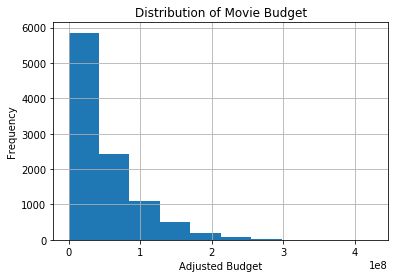

In [47]:
# the distribution of budget values
df_final.budget_adj.hist();
plt.xlabel('Adjusted Budget')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Budget')

From the histogram we can see that Movie Budget rating is clustred below 100M and that the figure is skewed to the right, which is expected. The histogram distribution is not clear due to the wide spread of the values for the budget and the high std deviation to look more into it i will draw the box plot 

Text(0.5,1,u'Distribution of Movie Budget')

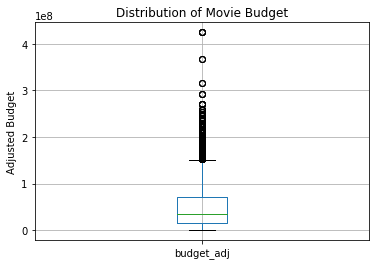

In [48]:
df_final.boxplot(column='budget_adj');
plt.ylabel('Adjusted Budget')
plt.title('Distribution of Movie Budget')

It is clear from the box plot that we have large number of values above the upper whiskers which corrsponds to 1.5 IQR = 1.5(Q3-Q1) = 81.248460M which can be possible outliers in the data we have.

In [49]:
IQR = (7.032122e+07 - 1.615558e+07)
IQR

54165640.0

In [50]:
# lowest_datum boxplot
print 1.5*IQR

81248460.0


<a id='eda'></a>
## Exploratory Data Analysis
StepBefore going through the analysis i will explore the variables that will be used in the analysis such as 'runtime','vote_average','normalized_popularity','budget_adj'. i will explore the distribution in values for these attributes.
### Research Question 1: Which genres are the most popular from year to year?
Get for each year the most popular genre according to the highest popurlity: 
 - Step 1: this was acheived by ordering the data by popularity descending and release year ascending
 - Step 2: grouping by the year then selecting the genre 
 - Step 3: pick the first value which corresponds to the genre with the max popularity 


In [51]:
df_final.sort_values(['release_year', 'normalized_popularity'], ascending=[True, False]).groupby('release_year')['Genre'].first()

release_year
1960              Drama
1961          Adventure
1962          Adventure
1963             Action
1964          Adventure
1965          Adventure
1966              Drama
1967             Family
1968    Science Fiction
1969          Adventure
1970          Animation
1971    Science Fiction
1972              Drama
1973          Animation
1974              Drama
1975              Drama
1976              Crime
1977          Adventure
1978              Music
1979             Horror
1980          Adventure
1981          Adventure
1982    Science Fiction
1983          Adventure
1984             Action
1985          Adventure
1986             Horror
1987    Science Fiction
1988             Action
1989          Animation
1990             Action
1991            Romance
1992              Crime
1993            Romance
1994           Thriller
1995              Crime
1996             Action
1997              Drama
1998             Comedy
1999              Drama
2000             Action
200

Across the years Adenture seem to be the most popular genre and to confirm this i will use the value_counts on the grouped data

In [52]:
# we can also look into the value counts 
# to see the genres that repeated the most across the years
popular_genres_groupedby_year = df_final.sort_values(['release_year', 'normalized_popularity'], ascending=[True, False]).groupby('release_year')['Genre'].first().reset_index()
popular_genres_groupedby_year.Genre.value_counts()

Adventure          17
Action             10
Drama               8
Science Fiction     5
Animation           4
Crime               3
Horror              2
Romance             2
Thriller            1
Comedy              1
Music               1
Fantasy             1
Family              1
Name: Genre, dtype: int64

The most common genre across the years is Adenture followed by action while the least common across the years is family, Thriller, Comedy, Music, Fantasy, Family  

### Research Question 2: What kinds of properties are associated with movies that have high revenues?
- Step 1: create a new column with groups of different revenues according to min, 25%, 50%, 75%, max
- Step 2: check the attributes of high revenue movies
- Step 3: check for each revenue level the following attributes: 'runtime','vote_average','normalized_popularity','budget_adj'.
    - using mean for the above attributes
    - bar plot for each variable 
- Step 4: check if movies with higher budgets has higher revenue:
    - using scatter plot for the two attributes
    - using pearson correlation
- Step 5: check if movies with higher popularity has higher revenue:
    - using scatter plot for the two attributes
    - using pearson correlation
- Step 6: check genres associated with high revenue
- Step 7: check director associated with high revenue

In [53]:
# revenue range
df_final.revenue_adj.describe()

count    1.016800e+04
mean     1.535897e+08
std      2.333281e+08
min      1.388176e+04
25%      2.173537e+07
50%      6.981383e+07
75%      1.856079e+08
max      2.827124e+09
Name: revenue_adj, dtype: float64

The movie with the least revenue  was around 13.8k dollars while the highest revenue a movie acheived was around 2.827M dollars. The median for movies revenue in this dataset is 69.8M.

#### Step 1: create a new column with groups of different revenues according to min, 25%, 50%, 75%, max

In [54]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [1.388176e+04, 1.197769e+07, 7.042110e+07, 1.985220e+08, 2.827124e+09]

In [55]:
# Labels for the four revenue level groups
bin_names = ['Low','Medium','Moderately High','High' ]

In [56]:
#create the revenue_levels column
df_final['revenue_levels'] = pd.cut(df_final['revenue_adj'], bin_edges, labels=bin_names)
df_final.head()

,id,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,normalized_popularity,Genre,revenue_levels
0,135397,Jurassic World,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.000000,Action,High
1,135397,Jurassic World,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.000000,Adventure,High
2,135397,Jurassic World,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.000000,Science Fiction,High
3,135397,Jurassic World,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.000000,Thriller,High
4,76341,Mad Max: Fury Road,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,0.861577,Action,High


we can check for Jurassic park it has a 1.392446e9 and revenue level of high since it is more than Q3 which is 1.856079e+08

#### Step 2: check the attributes of high revenue movies

In [57]:
# quick view of the attributes and high revenue
df_final[['runtime','vote_average','normalized_popularity','budget_adj','revenue_levels']].query('revenue_levels == "High"').describe()

,runtime,vote_average,normalized_popularity,budget_adj
count,2382.000000,2382.000000,2382.000000,2.382000e+03
mean,117.945424,6.484425,0.076022,9.716208e+07
std,23.466714,0.705130,0.080443,5.772068e+07
min,78.000000,4.400000,0.003954,3.272632e+04
25%,100.000000,6.000000,0.035626,5.065377e+07
50%,115.000000,6.500000,0.055900,9.012052e+07
75%,131.000000,7.000000,0.089397,1.335582e+08
max,248.000000,8.300000,1.000000,3.683713e+08


looking at the above we can see that high revenue movies have the following attributes:
- mean run time 117.95 minutes 
- mean vote average 6.48
- mean normalized popularity 0.076022
- mean budget 9.712e7

#### Step 3: check for each revenue level the following attributes: 'runtime','vote_average','normalized_popularity','budget_adj'.

In [58]:
# check the attributes asscoiated with different revenue level
df_final.groupby('revenue_levels')['runtime','vote_average','normalized_popularity','budget_adj'].mean()

,runtime,vote_average,normalized_popularity,budget_adj
revenue_levels,,,,
Low,103.143681,5.914080,0.016483,1.576685e+07
Medium,106.202134,6.018168,0.023775,3.210179e+07
Moderately High,111.132512,6.201306,0.038069,5.309176e+07
High,117.945424,6.484425,0.076022,9.716208e+07


From the above we can see that higher revenue, have higher runtime, popularity, budget. everything is increasing with the level of revenue

Text(0,0.5,u'Average Runtime')

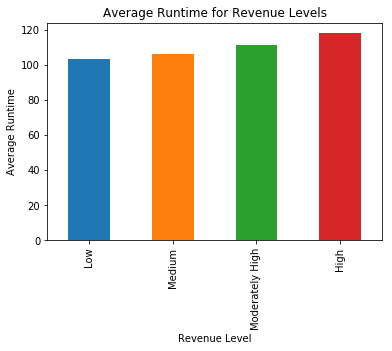

In [59]:
# bar plot for mean runtime 
grouped_df_runtime = df_final.groupby(["revenue_levels"])['runtime'].mean()
grouped_df_runtime.plot(kind='bar',title = 'Average Runtime for Revenue Levels');
plt.xlabel("Revenue Level")
plt.ylabel("Average Runtime")


From the figure it seems that higher runtime can be associated with higher revenue. we can measure the correlation to confirm how strong it is.

In [60]:
df_final['revenue_adj'].corr(df_final['runtime'],method='pearson')

0.27591160443341023

a pearson correlation of 0.275 does not correspond to a strong correlation. since this value typically range from 0-1 so closer to 0 is a weaker correlation.  

Text(0,0.5,u'Average Vote')

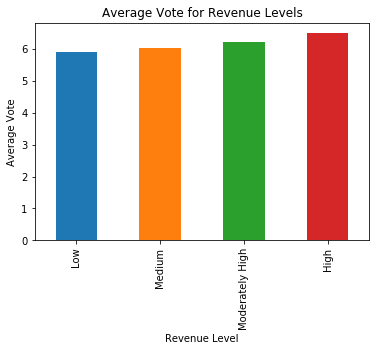

In [61]:
# bar plot for mean vote_average
grouped_df_runtime = df_final.groupby(["revenue_levels"])['vote_average'].mean()
grouped_df_runtime.plot(kind='bar',title = 'Average Vote for Revenue Levels');
plt.xlabel("Revenue Level")
plt.ylabel("Average Vote")


From the figure it seems that higher average can be associated with higher revenue. but to confirm we can use pearson.

In [62]:
df_final['revenue_adj'].corr(df_final['vote_average'],method='pearson')

0.2852731671877251

a pearson correlation of 0.285 does not correspond to a strong correlation. since this value typically range from 0-1 so closer to 0 is a weaker correlation.  

Text(0,0.5,u'Average Normalized Popularity')

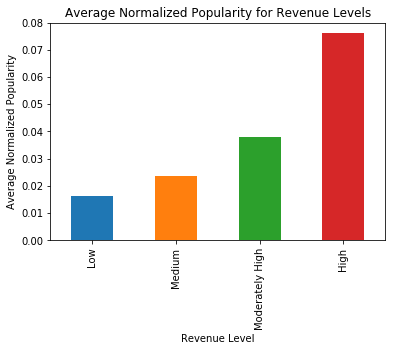

In [63]:
# bar plot for mean popularity 
grouped_df_runtime = df_final.groupby(["revenue_levels"])['normalized_popularity'].mean()
grouped_df_runtime.plot(kind='bar',title = 'Average Normalized Popularity for Revenue Levels');
plt.xlabel("Revenue Level")
plt.ylabel("Average Normalized Popularity")

From the figure it seems that higher popularity can be associated with higher revenue. but to confirm we can use pearson correlation.

In [64]:
df_final['revenue_adj'].corr(df_final['normalized_popularity'],method='pearson')

0.5448821028495663

a pearson correlation of 0.5448 does correspond to a good correlation. since this value typically range from 0-1 so closer to 1 is a good correlation.  

Text(0,0.5,u'Average Budget')

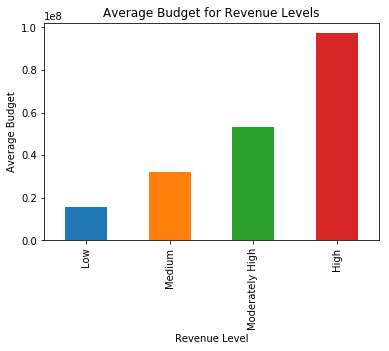

In [65]:
# bar plot for mean budget 
grouped_df_runtime = df_final.groupby(["revenue_levels"])['budget_adj'].mean()
grouped_df_runtime.plot(kind='bar',title = 'Average Budget for Revenue Levels');
plt.xlabel("Revenue Level")
plt.ylabel("Average Budget")

From the figure it seems that higher budget can be associated with higher revenue. we can measure the correlation to confirm how strong it is.

#### Step 4: check if movies with higher budgets has higher revenue:

Text(0.5,1,u'Revenue versus Budget')

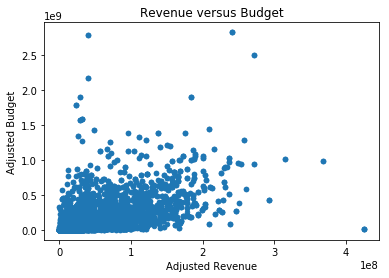

In [66]:
#create scatter plot for revenue vs budget 
df_final.plot(y='revenue_adj', x = 'budget_adj',kind = 'scatter');
plt.xlabel("Adjusted Revenue")
plt.ylabel("Adjusted Budget")
plt.title("Revenue versus Budget")

In [67]:
# pearson correlation coefficent 
df_final['revenue_adj'].corr(df_final['budget_adj'],method='pearson')

0.5602491796182587

In the scatter plot the correlation is not very clear but when we check the pearson correlation it is 0.56 so since this value range between 0-1. there is a correlation between the budget adn revenue 

#### Step 6: check genres associated with high revenue

In [68]:
# get the genres count for high revenue using groupby and count
df_final.query('revenue_levels == "High"').groupby(['Genre'])['revenue_levels'].count()

Genre
Action             337
Adventure          309
Animation          102
Comedy             258
Crime              104
Drama              254
Family             164
Fantasy            151
History             22
Horror              43
Music               26
Mystery             62
Romance            112
Science Fiction    156
Thriller           233
War                 36
Western             13
Name: revenue_levels, dtype: int64

More movies with Action genre generate high revenue followed by adventure while less Western Genres are associated with high revenue

<a id='conclusions'></a>
## Conclusions

- In this work the dataset has be cleaned by handling null values, wrong datatype and erroneous values.

Examples would be null or missing value, erroneous values like those zero values of budget and revenue, and also whether this dataset can properly represent the population or not.

- Limitation of this analysis: 
    - Difficulty in finding outliers and erroneous values. it was dififcult to find these values in the budget and revenue because it covers large range.
    - the data contained wrong values as mentioned for wanted movie so maybe other movies had a similar issue but was not detected.
    - The dataset contain a subset of movies. so it can be biased for a certain genre for example.
    - the data in the dataset does not have a proper definition for the variables so it was not clear how popularity was measured for example.
    - when looking into average vote, it should take into consideration the vote count. for a example 10 average vote movie with 1 vote is not the same as a movie with 100 votes and 10 average vote.
- Looked into the following Questions:
    - Which genres are most popular from year to year?
    - What kinds of properties are associated with movies that have high revenues?
- The results of the analysis were as follows:
    - Adventure genre is the most common genre across the years followed by Action genre.
    - higher revenue, have higher runtime, popularity, budget. 